<a href="https://colab.research.google.com/github/KimJunGu9/ADP_ML/blob/main/6_1_%EC%96%B8%EB%8D%94_%EC%83%98%ED%94%8C%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# 데이터 수준

# 데이터 세트의 균형을 맞추기 위해 리샘플링 기술(언더 샘플링 or 오버 샘플링)을 적용.

In [2]:
# 알고리즘 수준

# 각 클래스의 train data의 size에 따라 가중 비용을 조정하여 수행
# ex ) SVM의 C값의 설정 및 의사결정 나무의 가중치 등
# 딥러닝의 Weight balancing

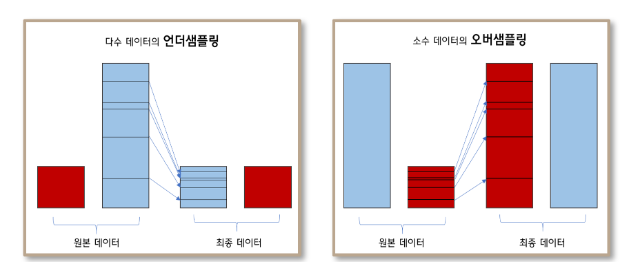

In [3]:
# 언더샘플링


# 다수 클래스의 샘플을 소수 클래스의 분포 비율과 일치하도록 무작위로 제거함.
# 2개의 클래스의 비율을 맞추기 위해 귀중한 정보를 잃어버리고 편향될 수 있기 때문에 작은 데이터에서는 선호되지 않음
# 오버 샘플링보다 언더 샘플링이 비용이 더 적게 듬
# 다수의 부정적인 클래스 일부를 줄이는 것이 허용됨
# 긍정 클래스의 정보가 많다면 언더샘플링을 하는 경향이 있음

In [4]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
credit = pd.read_csv('/content/drive/MyDrive/ADP/Part.2/1. 통계분석/data/data/credit_final.csv')

In [7]:
X = credit.drop(['credit.rating'],axis=1)
y = credit['credit.rating']

In [8]:
y.value_counts()

1    700
0    300
Name: credit.rating, dtype: int64

<BarContainer object of 2 artists>

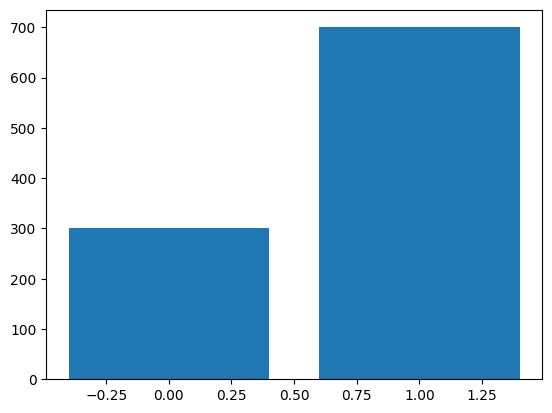

In [9]:
import matplotlib.pyplot as plt 

plt.bar(y.value_counts().index, y.value_counts().values)

In [10]:
import imblearn.under_sampling.base

In [11]:
from imblearn.under_sampling import RandomUnderSampler

X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X, y)

<BarContainer object of 2 artists>

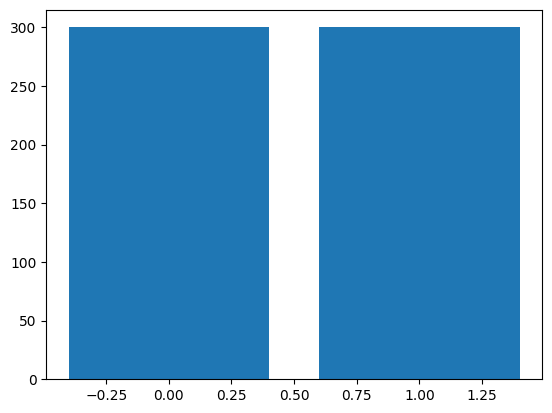

In [12]:
plt.bar(y_resampled.value_counts().index, y_resampled.value_counts().values)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)

clf = RandomForestClassifier() 
clf.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)

ImportError: ignored

In [15]:
X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=321)
clf_re = RandomForestClassifier() 
clf_re.fit(X_re_train,y_re_train)

plot_roc_curve(clf_re, X_re_test, y_re_test)

NameError: ignored